In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


"deep" orqali memory usage ni aniqlab olish

In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 286.5 KB


### Smoker column ni one hot encoding qilish

In [5]:
pd.get_dummies(df,columns=["smoker"],dtype=int)

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,1,0
1334,18,female,31.920,0,northeast,2205.98080,1,0
1335,18,female,36.850,0,southeast,1629.83350,1,0
1336,21,female,25.800,0,southwest,2007.94500,1,0


In [6]:
df_2 = pd.get_dummies(df,columns=["smoker"],dtype=int,drop_first=True)

In [7]:
df["smoker"] = df_2["smoker_yes"]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


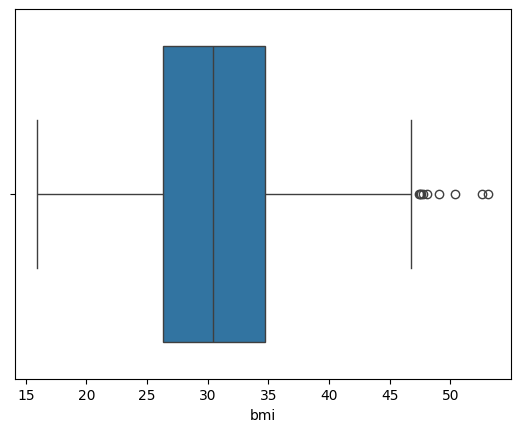

In [8]:
sns.boxplot(x="bmi", data=df)
plt.show()

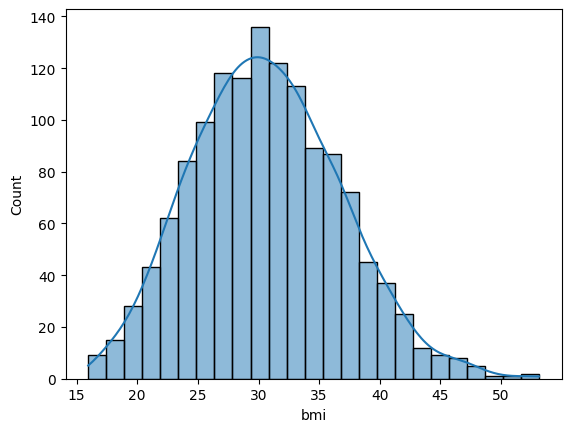

In [9]:
sns.histplot(x="bmi", data=df,kde=True)
plt.show()

In [10]:
df["bmi"].quantile()

np.float64(30.4)

2 xil usulda  normal distribution uchun max qiymatni topish(outlierladan tashqari bo'lgan)


In [11]:
mean = df["bmi"].mean()
std = df["bmi"].std()
 
m = (df["bmi"].quantile() / 2) + df["bmi"].quantile()
n = mean + (3 * std)


.loc dan foydalanib outlierlarni max ga tenglash

In [12]:
df.loc[df["bmi"] > m, "bmi"] = m

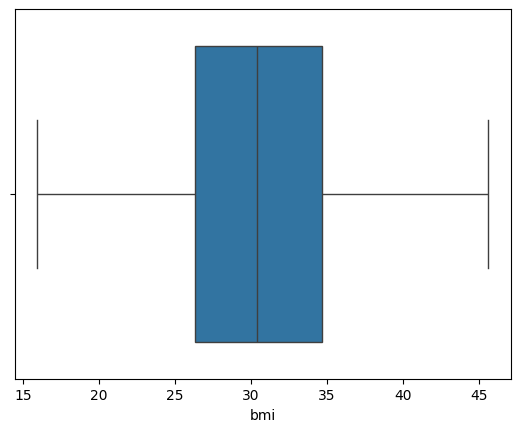

In [13]:
sns.boxplot(x="bmi", data=df)
plt.show()

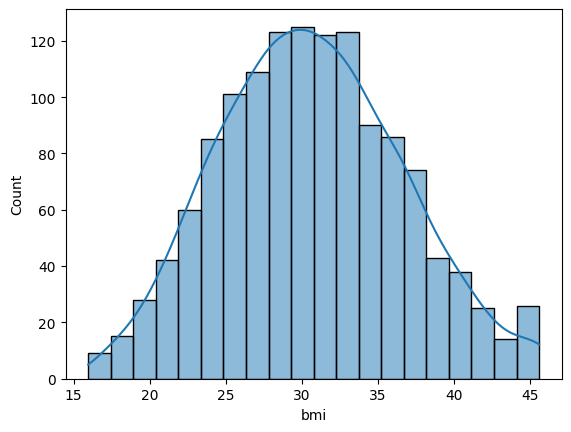

In [14]:
sns.histplot(x="bmi", data=df,kde=True)
plt.show()


In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


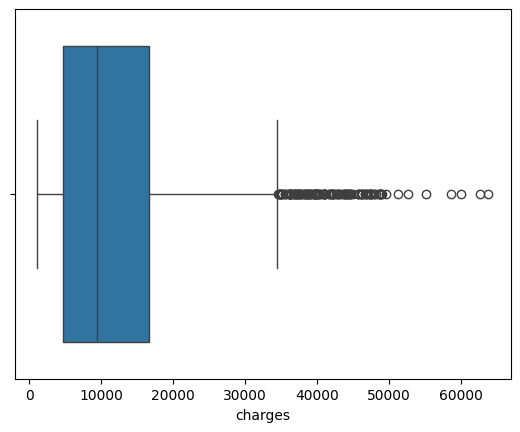

In [16]:
sns.boxplot(x="charges", data=df)
plt.show()


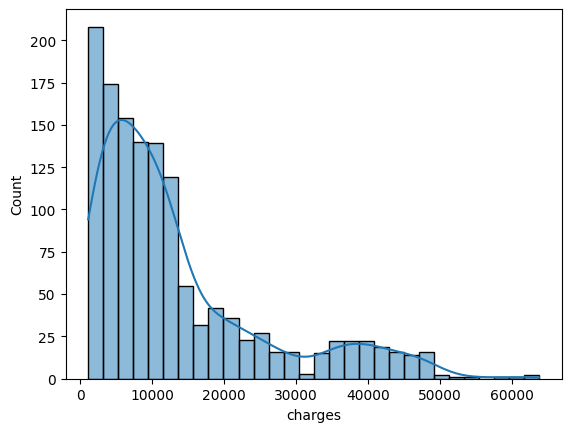

In [17]:
sns.histplot(x="charges", data=df,kde=True)
plt.show()


Skewed distributionda Outlier larni max ga tenglash 


In [18]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

max = Q3 + IQR * 1.5
max


np.float64(34489.350562499996)

In [19]:
df.loc[df["charges"] > max, "charges"] = max


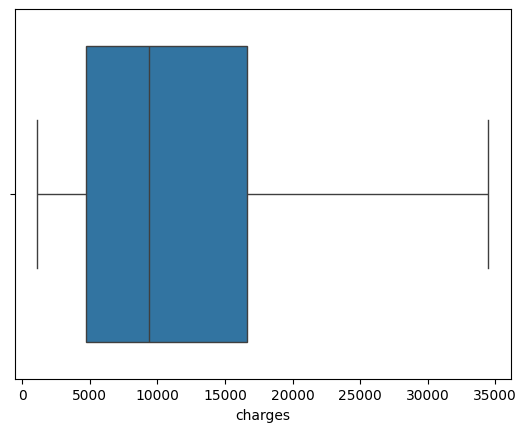

In [20]:
sns.boxplot(x="charges", data=df)
plt.show()


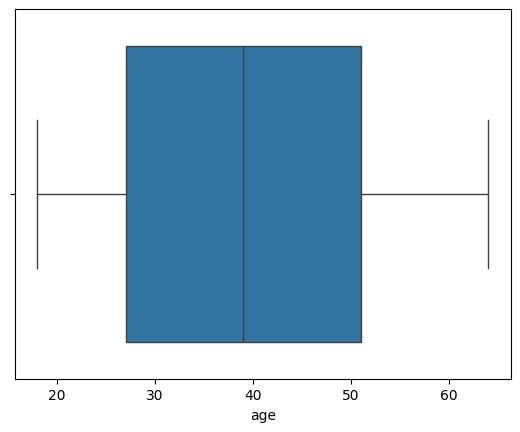

In [21]:
sns.boxplot(x="age", data=df)
plt.show()

Yuqoridagi boxplotdan age column da outlierlari yo'qligi uchun uni o'zgartirmadim